In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\Pc\Desktop\ML TPs\TP3\student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Dataset description and visualisation

#### 2- Since we are analyzing the relationship between two variables (hours and scores), this is a simple linear regression problem, where one independent variable (hours) is used to predict one dependent variable (scores).

#### 3- Identify Dependent and Independent Variables

#### *Dependent Variable (Y): Scores (the outcome we want to predict).
#### *Independent Variable (X): Hours (the predictor variable).

In [2]:
print("Number of samples:", df.shape[0])
print("Number of features:", df.shape[1])


Number of samples: 25
Number of features: 2


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [4]:
print(df.describe())


           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


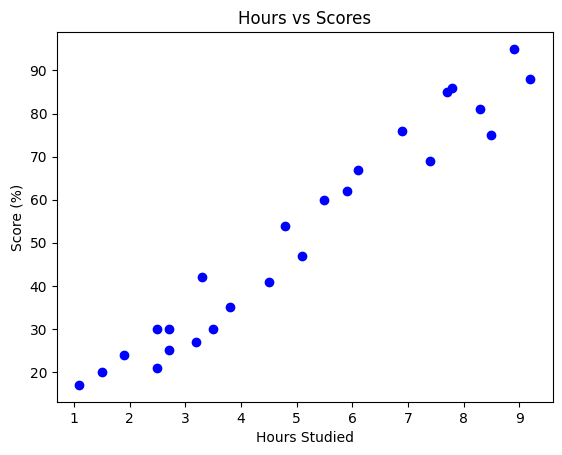

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df['Hours'], df['Scores'], color='blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score (%)')
plt.show()


### Dataset training and evaluation

### 1. Split the Dataset

In [9]:
from sklearn.model_selection import train_test_split

# Assume df is already loaded and contains 'Hours' and 'Scores' columns
X = df[['Hours']]  # Independent variable
y = df['Scores']   # Dependent variable

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### 2. Train the Model

In [10]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### 3. Display the Model's Equation
The linear regression model equation is in the form  y=mx+c, where:
    𝑚  is the coefficient (slope)
    c is the intercept

In [11]:
m = model.coef_[0]
c = model.intercept_
print(f"Model equation: y = {m:.2f}x + {c:.2f}")


Model equation: y = 9.91x + 2.02


### 4. Plot the Data and Model

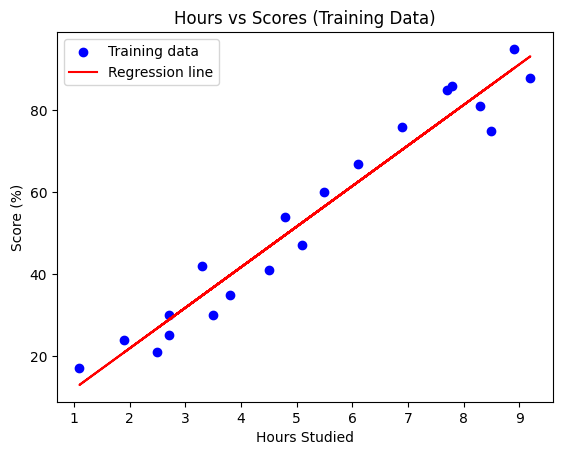

In [14]:
import matplotlib.pyplot as plt

# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Training data')
# Plot the regression line
plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')

plt.title('Hours vs Scores (Training Data)')
plt.xlabel('Hours Studied')
plt.ylabel('Score (%)')
plt.legend()
plt.show()


### 5. Evaluate Model Performance

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("Training Set Performance:")
print(f"MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, R-squared: {r2_train:.2f}")
print("\nTesting Set Performance:")
print(f"MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, R-squared: {r2_test:.2f}")


Training Set Performance:
MAE: 5.19, MSE: 30.90, RMSE: 5.56, R-squared: 0.95

Testing Set Performance:
MAE: 4.18, MSE: 21.60, RMSE: 4.65, R-squared: 0.95


### 6. R-squared Explanation
The R-squared metric, or coefficient of determination, explains the proportion of variance in the dependent variable that can be predicted from the independent variable(s).

Advantages: R-squared is useful because it provides a relative measure of how well the model captures the data's variance, unlike absolute metrics like MAE, MSE, and RMSE, which are influenced by the scale of the data.
Limitations: A high R-squared doesn’t always indicate a good model, especially for non-linear data.

### 7. Assess Model Performance
Evaluate whether the model is good based on metrics:

Good Performance: Low values for MAE, MSE, and RMSE, along with a high R-squared (close to 1), usually indicate good performance.

### 8. Plot Actual vs. Predicted Values

C:\Users\Pc\AppData\Local\Temp\ipykernel_13816\3933447659.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='green')  # Reference line


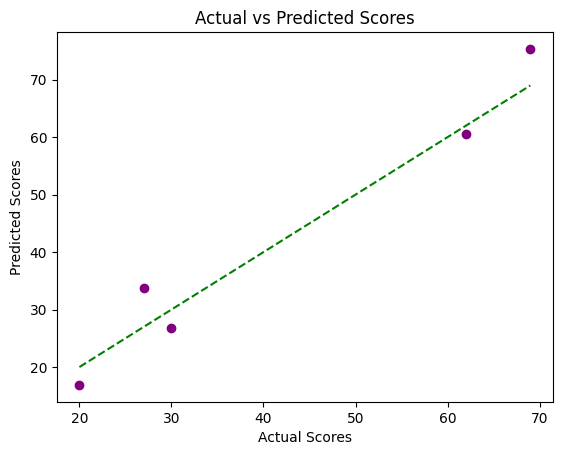

In [16]:
plt.scatter(y_test, y_test_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='green')  # Reference line

plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()
